In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.datasets import mnist

In [3]:
from matplotlib.pyplot import imshow, show

def show_numpy_image(data):
  imshow(data, interpolation='nearest')
  show()

## Loading the MNIST dataset.

11493376/11490434 [==============================] - 0s 0us/step
Lable:  0


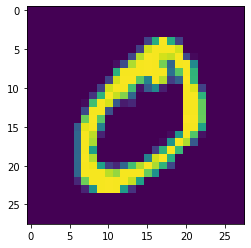

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Lable: ", y_train[1])
show_numpy_image(x_train[1])

In [ ]:
#@title Summery of MNIST dataset

print("type x_train: ", type(x_train), "\ntype y_train: ", type(y_train))
print("shape x_train: ", x_train.shape, "\nshape x_test:", x_test.shape)
print("- -" * 10, "sample image", "- -"* 10)
print(x_train[0])

type x_train:  <class 'numpy.ndarray'> 
type y_train:  <class 'numpy.ndarray'>
shape x_train:  (60000, 28, 28) 
shape x_test: (10000, 28, 28)
- -- -- -- -- -- -- -- -- -- - sample image - -- -- -- -- -- -- -- -- -- -
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 1

In [5]:
# Normalize

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#@title Image after Normalization

print("- -" * 10, "sample image", "- -"* 10)
print(x_train[0])

In [8]:
from numpy import expand_dims

In [9]:
# Resize

x_train = expand_dims(x_train, -1)
x_test = expand_dims(x_test, -1)

In [10]:
#@title After resizeing shapes !

print("shape x_train: ", x_train.shape, "\nshape x_test:", x_test.shape)

shape x_train:  (60000, 28, 28, 1) 
shape x_test: (10000, 28, 28, 1)


In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
print("Before 1 hot encodeing: ", y_train[0])

y_train = to_categorical(y_train, num_classes = 10)

print("After 1 hot encoding:", y_train[0])

Before 1 hot encodeing:  5
After 1 hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Set the random seed
random_seed = 2

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

In [15]:
#@title Summery of MNIST dataset

print("type x_train: ", type(x_train), "\ntype y_train: ", type(y_train))
print("shape x_train: ", x_train.shape, "\nshape y_train:", y_train.shape)

type x_train:  <class 'numpy.ndarray'> 
type y_train:  <class 'numpy.ndarray'>
shape x_train:  (54000, 28, 28, 1) 
shape y_train: (54000, 10)


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [18]:
# Making model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [19]:
from keras.optimizers import RMSprop

In [21]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [20]:
from keras.callbacks import ReduceLROnPlateau

In [22]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [23]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
# Fit the model
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

In [ ]:
#@title Uploading the model after training

from google.colab import files
uploaded = files.upload()

In [27]:
#@title Loading model

from keras.models import load_model

model = load_model("/content/drive/My Drive/seminar/number.h5")

In [28]:
# predict results
results = model.predict(x_test)

[1.8941096e-06 1.6484520e-06 9.9999607e-01 1.1667929e-07 1.5821568e-09
 4.5903394e-12 1.8075864e-09 5.3758917e-08 1.9015037e-07 3.7800016e-09]
[0 0 1 0 0 0 0 0 0 0]


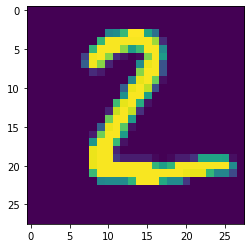

In [29]:
from numpy import reshape
print(results[1])

encoded = (results == results.max(axis=1)[:,None]).astype(int)
print(encoded[1])

show_numpy_image(reshape(x_test[1], (1, 28, 28))[0])

In [ ]:
# saving model
model.save("number.h5")

In [ ]:
from keras.models import load_model

model = load_model("number.h5")